# DCO - TP3

## Huffman and Reed-Solomon Codes

In [2]:
%matplotlib ipympl

# libraries
## standard libraries
import logging as log
from typing import Any, Iterable

## third-party libraries
import numpy as np
import pandas as pd
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.font_manager as fm
import seaborn as sb
import galois
from tqdm.auto import tqdm

## custom libraries
from tp3 import letter_frequencies, HuffmanNode, InteractiveGrid, qrcode


# configurations
log.basicConfig(
    force=True,
    style='{',
    format="[{levelname:.1s}] {message}",
    level=log.INFO
)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

### I - Source Coding

#### 1. Entropy

##### **Frequencies of French letters**

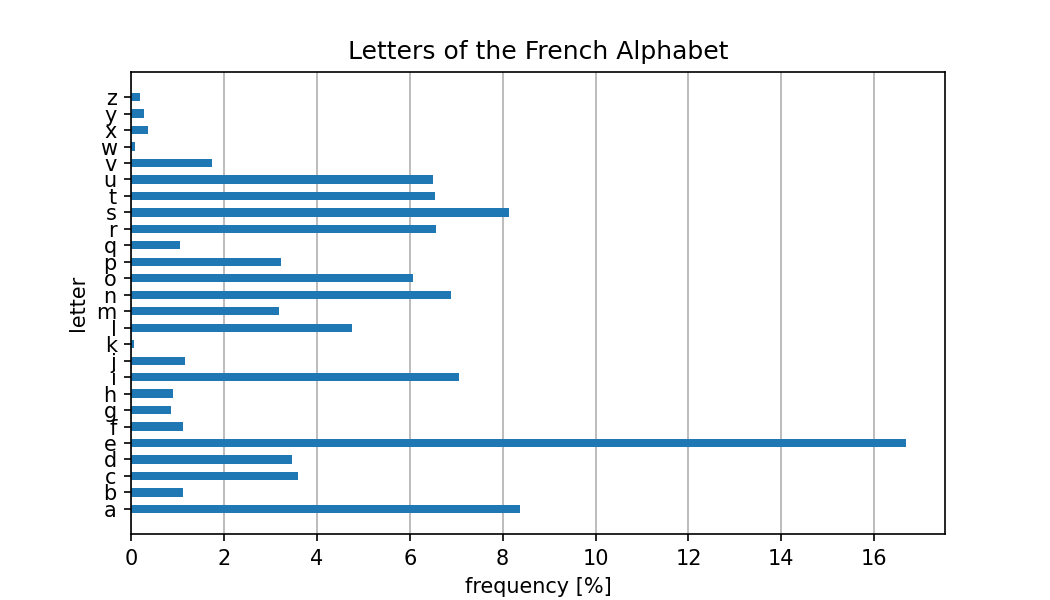

In [2]:
# character frequencies
fig, ax = plt.subplots(
    figsize=[7,4], dpi=150, 
    gridspec_kw=dict(wspace=0.1)
)

# plot frequencies
ax.set(
    title="Letters of the French Alphabet",
    xlabel="frequency [%]",
    ylabel="letter"
)
ax.barh(
    y=letter_frequencies.index,
    width=letter_frequencies['frequency'], 
    height=.5,
)
ax.set_axisbelow(True)
ax.xaxis.grid(visible=True)

##### **Entropy**

In [3]:
def entropy(probabilities: list[float]) -> float:
    """Compute entropy i.e. average information E[-log2 p(X)].

    Args:
        probabilities (List[float]): probabilities of the source symbols.

    Returns:
        float: the entropy
    """
    raise NotImplementedError("You must implement the computation of entropy.")

h = entropy(letter_frequencies['frequency']/100)
log.info(f"H(S) = {h} bitshes/symb")

[I] H(S) = 4.037283727003855 bitshes/symb


#### 2. Huffman coding

##### **Tree**

In [4]:
def huffman_tree(symbols: Iterable[Any], probabilities: Iterable[float]):
    """Build a binary Huffman tree.

    Args:
        symbols (Iterable[Any]): symbols that are encoded
        probabilities (Iterable[float]): occurence probabilities in [0, 1] of the symbols

    Returns:
        HuffmanNode: root of the Huffman tree.
    """
    raise NotImplementedError("You must implement the construction of the Huffman tree.")

# huffman tree
tree = huffman_tree(letter_frequencies.index, letter_frequencies['frequency'])
log.info("Huffman tree\n%s", tree)


[I] Huffman tree
('a', 'g', 'h', 'x', 'y', 'k', 'w', 'z', 'q', 'l', 'b', 'f', 'j', 'v', 'o', 'm', 'p', 'u', 't', 'r', 'n', 'i', 'd', 'c', 's', 'e')
├ 0: ('a', 'g', 'h', 'x', 'y', 'k', 'w', 'z', 'q', 'l', 'b', 'f', 'j', 'v', 'o', 'm', 'p', 'u')
| ├ 0: ('a', 'g', 'h', 'x', 'y', 'k', 'w', 'z', 'q', 'l')
| | ├ 0: ('a',)
| | ├ 1: ('g', 'h', 'x', 'y', 'k', 'w', 'z', 'q', 'l')
| | | ├ 0: ('g', 'h', 'x', 'y', 'k', 'w', 'z', 'q')
| | | | ├ 0: ('g', 'h')
| | | | | ├ 0: ('g',)
| | | | | ├ 1: ('h',)
| | | | ├ 1: ('x', 'y', 'k', 'w', 'z', 'q')
| | | | | ├ 0: ('x', 'y', 'k', 'w', 'z')
| | | | | | ├ 0: ('x',)
| | | | | | ├ 1: ('y', 'k', 'w', 'z')
| | | | | | | ├ 0: ('y',)
| | | | | | | ├ 1: ('k', 'w', 'z')
| | | | | | | | ├ 0: ('k', 'w')
| | | | | | | | | ├ 0: ('k',)
| | | | | | | | | ├ 1: ('w',)
| | | | | | | | ├ 1: ('z',)
| | | | | ├ 1: ('q',)
| | | ├ 1: ('l',)
| ├ 1: ('b', 'f', 'j', 'v', 'o', 'm', 'p', 'u')
| | ├ 0: ('b', 'f', 'j', 'v', 'o')
| | | ├ 0: ('b', 'f', 'j', 'v')
| | | | ├ 0: ('b', 'f')


##### **Encoding**

In [5]:
def huffman_encode(s: str, tree: HuffmanNode):
    """Encode a sequence of letters.

    Args:
        s (str): sequence to be encoded.
        tree (HuffmanNode): huffman tree.

    Returns:
        str: string of bits (e.g. "010001101...")
    """
    raise NotImplementedError("You must implement the Huffman encoding.")


# word
raw_string = input(f"Enter your word: ").lower()
log.info("raw_string: %s", raw_string)

# encoding
huffman_string = huffman_encode(raw_string, tree)
log.info("huffman_string: %s", huffman_string)

[I] raw_string: p
[I] huffman_string: 01101


##### **Decoding**

In [6]:
def huffman_decode(b: str, tree: HuffmanNode):
    """Decode a binary string into a symbol string from a Huffman tree.

    Args:
        b (str): binary string to be decoded
        tree (HuffmanNode): Huffman tree

    Return:
        str: decoded symbol string
    """
    raise NotImplementedError("You must implement the Huffman decoding.")


# decoding
error_position = 2
if error_position >= 0:
    huffman_string = f"{huffman_string[:error_position]}{1 - int(huffman_string[error_position])}   {huffman_string[error_position+1:]}"
    log.info("huffman_string (with error): %s", huffman_string)
decoded_string = huffman_decode(huffman_string, tree)
log.info("decoded_string: %s", decoded_string)

[I] huffman_string (with error): 010   01
[I] decoded_string: 


### II - Channel Coding

#### 1. Galois field

In [7]:
# Galois field
q = 2 ** 3
# gf = galois.GF(q, repr='int') # representation of the elements as integers
gf = galois.GF(q, repr='power') # representation of the elements as powers of α
log.info("Galois Field GF(%s^%s)\n%s", gf.characteristic, gf.degree, gf.repr_table())

# Polynomial
a = galois.Poly([2, 0, 0], field=gf)
b = galois.Poly([1, 1], field=gf)
log.info("a(X) = %s, deg(a) = %s", a, a.degree)
log.info("b(X) = %s, deg(b) = %s", b, b.degree)
log.info("sum: a(X) + b(X) = %s", a + b)
log.info("product: a(X) * b(X) = %s", a * b)
log.info("quotient: a(X) // b(X) = %s", a // b)
log.info("remainder: a(X) %% b(X) = %s", a % b)

[I] Galois Field GF(2^3)
 Power    Polynomial     Vector    Integer 
------- ------------- ----------- ---------
   0          0        [0, 0, 0]      0     
  x^0         1        [0, 0, 1]      1     
  x^1         x        [0, 1, 0]      2     
  x^2        x^2       [1, 0, 0]      4     
  x^3       x + 1      [0, 1, 1]      3     
  x^4      x^2 + x     [1, 1, 0]      6     
  x^5    x^2 + x + 1   [1, 1, 1]      7     
  x^6      x^2 + 1     [1, 0, 1]      5     
[I] a(X) = (α)x^2, deg(a) = 2
[I] b(X) = x + 1, deg(b) = 1
[I] sum: a(X) + b(X) = (α)x^2 + x + 1
[I] product: a(X) * b(X) = (α)x^3 + (α)x^2
[I] quotient: a(X) // b(X) = (α)x + α
[I] remainder: a(X) % b(X) = α


#### 2. Encoding

In [8]:
def rs_encode(message: galois.Poly, generator: galois.Poly):
    """
    rs_encode Encode a message polynomial of length k

    Args:
        message (Poly): message polynomial
        generator (Poly): generator polynomial

    Returns:
        Poly: codeword polynomial
    """
    raise NotImplementedError("You must implement the computation of the Reed-Solomon encoding.")

# code parameters
n, k = gf.order - 1, 5
log.info("RS(n=%s, k=%s, d=%s, 2t=%s)", n, k, n - k + 1, n - k)

# generator
# g_zeros = gf(np.sort(np.random.choice(gf.primitive_elements, size=n - k, replace=False)))
shift = 1
g_zeros = (gf.primitive_element**np.arange(shift, shift + n - k))
g_factors = [galois.Poly([1, -zero], field=gf) for zero in g_zeros]
g = galois.prod(*g_factors)
log.info("g(x) = %s = %s", "("+")(".join(map(str, g_factors))+")", g)

# message
m = galois.Poly(gf.Random(k))
log.info(f"m(x) = {m}")

# codeword
c = rs_encode(m, g)
log.info(f"c(x) = {c}")

[I] RS(n=7, k=5, d=3, 2t=2)
[I] g(x) = (x + α)(x + α^2) = x^2 + (α^4)x + α^3
[I] m(x) = (α^4)x^4 + x^3 + (α^5)x + α^4
[I] c(x) = (α^4)x^6 + x^5 + (α^5)x^3 + (α^4)x^2 + α^3


#### 3. Decoding

In [9]:
# error polynomial
e_degree = 1
e = galois.Poly(gf.Random(e_degree, low=1))
log.info(f"e(X) = {e}")

# altered codeword
c_tilde = c + e
log.info(f"c̃(X) = {c_tilde}")

# decoding
rs = galois.ReedSolomon(
    n=n,
    k=k,
    c=shift,
    field=gf
)
m_est, n_errors_corrected = rs.decode(c_tilde.coeffs, output="message", errors=True)
m_est = galois.Poly(m_est)
log.info(f"n_errors_corrected = {n_errors_corrected}")
log.info(f"m(x) = {m} ➡ m_est(x) = {m_est}")

[I] e(X) = α
[I] c̃(X) = (α^4)x^6 + x^5 + (α^5)x^3 + (α^4)x^2 + 1
[I] n_errors_corrected = 1
[I] m(x) = (α^4)x^4 + x^3 + (α^5)x + α^4 ➡ m_est(x) = (α^4)x^4 + x^3 + (α^5)x + α^4


### III - End-to-end Transmission

#### 1. Simulations

In [10]:
# alphabet
alphabet = list(lettre for lettre in "abcdefghijklmnopqrstuvwxyz")

# field
gf = galois.GF(2**8, repr='int')
n = gf.order - 1

# parameters
max_iter = 10**1

# ranges
settings = {
    'd': 2**np.arange(0, np.log2(n), dtype=int),
    'e': 2**np.arange(0, np.log2(n), dtype=int),
    'i': np.arange(0, max_iter, dtype=int),
}

# progress bars
bar_settings = dict(
    miniters=1,
    position=0,
    bar_format='{bar}[{elapsed}<{remaining}, {rate_fmt}{postfix}]',
)
bars = {
    'd': tqdm(total=settings['d'].size, colour='#384247', **bar_settings),
    'e': tqdm(total=settings['e'].size, colour='#64769c', **bar_settings),
    'i': tqdm(total=settings['i'].size, colour="#98b3ed", **bar_settings)
}

# metrics
ser = np.zeros((settings['d'].size, settings['e'].size)) 

# estimation
for i, d in enumerate(settings['d']):
    bars['d'].set_postfix_str(f"d: {d:03d}/{n}")
    bars['d'].update()
    bars['e'].reset()
    
    # rs code
    rs = galois.ReedSolomon(n=n, d=int(d), field=gf)

    for j, e in enumerate(settings['e']):
        bars['e'].set_postfix_str(f"e: {e:03d}/{n}")
        bars['e'].update()
        bars['i'].reset()

        for iteration in settings['i']:
            bars['i'].set_postfix_str(f"i: {iteration}/{settings['i'][-1]}")
            bars['i'].update()

            message = galois.Poly(gf.Random(d, low=1))

            # channel coding
            codeword = galois.Poly(rs.encode(message.coeffs), field=rs.field)

            # channel
            codeword_altered = galois.Poly(codeword.coeffs)
            if e > 0:
                gf.Random(e, low=1,)
                coeffs = np.random.permutation([*np.random.randint(0, gf.order, e), *np.zeros(n - e)])
                error = galois.Poly(coeffs, field=rs.field)
                # log.info(error)
                codeword_altered += error

            # channel decoding
            message_estimated = galois.Poly(rs.decode(codeword_altered.coeffs), field=rs.field)

            # compute the metrics
            ser[i, j] += np.sum((message - message_estimated).coeffs > 0) / settings['i'].size
# ser /= settings['i'].size

          [00:00<?, ?it/s]

          [00:00<?, ?it/s]

          [00:00<?, ?it/s]

#### 2. Symbol Error Rate (SER)

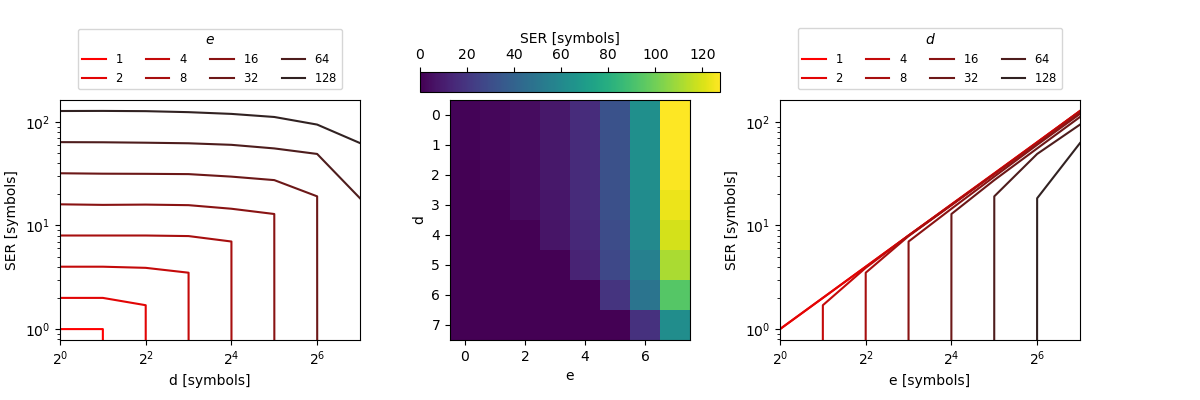

In [11]:
# figure
fig = plt.figure(figsize=[12, 4])

# axes
axes_properties=dict(
    ylabel="SER [symbols]",
    xlim=[2**0, max(settings['d'].max(), settings['e'].max())],
    prop_cycle=mpl.cycler(
        color=sb.dark_palette("red", n_colors=settings['d'].size, reverse=True)
    )
)
axes = {
    'd': fig.add_axes((0.05, 0.15, 0.25, 0.6), **axes_properties),
    'de': fig.add_axes((0.35, 0.15, 0.25, 0.6)), 'colorbar': fig.add_axes((0.35, 0.77, 0.25, 0.05), visible=True),
    'e': fig.add_axes((0.65, 0.15, 0.25, 0.6), **axes_properties),
}

# plots
## plot SER vs codeword distance d and number of errors e
im = axes['de'].imshow(ser)
axes['de'].set(xlabel='e', ylabel='d')
plt.colorbar(im, cax=axes['colorbar'], orientation='horizontal', ticklocation='top', label='SER [symbols]')

## plot SER vs codeword distance d
for e, y in zip(settings['e'], ser.T):
    axes['d'].plot(settings['d'], y, label=f"${e}$")
    axes['d'].set(xlabel='d [symbols]')
    axes['d'].set_xscale("log", base=2)
    axes['d'].set_yscale("log", base=10)
    axes['d'].legend(
        loc='lower center', 
        bbox_to_anchor=[.5, 1.02], 
        ncols=settings['e'].size//2,
        prop=dict(
            size='small'
        )
    ).set_title(f"$e$")

## plot SER vs number of errors e
for d, y in zip(settings['d'], ser):
    axes['e'].plot(settings['d'], y, label=f"${d}$")
    axes['e'].set(xlabel=f"e [symbols]")
    axes['e'].set_xscale("log", base=2)
    axes['e'].set_yscale("log", base=10)
    axes['e'].legend(
        loc='lower center', 
        bbox_to_anchor=[.5, 1.02], 
        ncols=settings['d'].size//2,
        prop=dict(
            size='small'
        )
    ).set_title(f"$d$")


### IV - QR Code

<!-- <img src="assets/qrcode_explained.plain.svg" style="width:min(500px, 100%)"> -->
<img src="assets/qrcode_placement.png" style="width:min(500px, 100%)">
<!-- ![QR code](assets/qrcode_placement.png) -->

[I] qr_content_str: a
[I] qr_content_bits: 01100001
[I] QR(version=1, mode=byte, level=l, size=(21, 21))


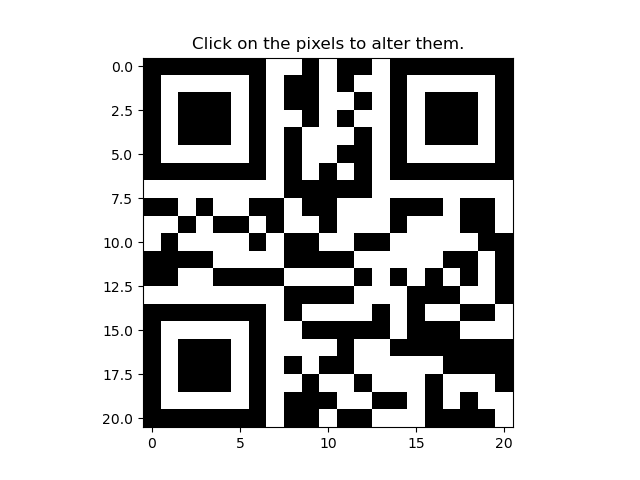

In [13]:
# text to be put inside the QR code
qr_content_str = "a"
log.info("qr_content_str: %s", qr_content_str)

# conversion from string to binary
qr_content_bits = "".join([f"{byte:08b}" for byte in bytes(qr_content_str, "utf-8")])
log.info("qr_content_bits: %s", qr_content_bits)

# build a QR encoder
qr_encoder = qrcode(
    version=1, # increase this parameter to increase the size of the QR code
    mode='byte', # do not change this value, only byte mode is supported
    level='l', # specify the robustness level of the QR code ('l', 'm', 'h')
    mask=7 # choose one of the possible masking to change the QR code scramling
)
log.info(qr_encoder)

# generate the QR code
InteractiveGrid(qr_encoder(information=qr_content_bits)) # <-- no ";" here, otherwise it breaks the interactivity feature...